LOAD DATA FROM EXCEL FILE

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the dataset from Excel
file_path = 'NAND_PolyGrain_Dist_Excel.xlsx'
data = pd.read_excel(file_path)


PREPARE THE DATA

In [3]:
# Define input and output variables
X = data[['width', 'ico', 'lcg', 'lsl', 'spcs', 'gsize','gsigma','max_angle','ycut','zseed','yseed','aseed']]
y = data['Vtgm_vgn']  # Program threshold voltage

# Split data into training and testing sets (80% train, 20% test)
n_train = int(0.8 * len(data))
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

PREPROCESS AND TRAIN THE MODEL

In [4]:
# Define the neural network model
model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layer 3
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Learning rate scheduler
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, callbacks=[lr_reduction])

# Save the trained model
model.save('program_threshold_nn_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 5.1101 - mae: 1.7964 - val_loss: 2.1130 - val_mae: 1.4262 - learning_rate: 0.0010
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.9935 - mae: 1.6411 - val_loss: 1.8057 - val_mae: 1.3138 - learning_rate: 0.0010
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.2761 - mae: 1.6656 - val_loss: 1.5946 - val_mae: 1.2277 - learning_rate: 0.0010
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.1288 - mae: 1.7007 - val_loss: 1.3722 - val_mae: 1.1355 - learning_rate: 0.0010
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4.2870 - mae: 1.6713 - val_loss: 1.1570 - val_mae: 1.0389 - learning_rate: 0.0010
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3.3885 - mae: 1.3889 - val_loss: 0.9637 - val_mae: 0.9444 - learning_rate: 0.0010
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.2165 - mae: 1.4917 - val_loss: 0.8246 - val_mae: 0.8655 - learning_rate: 0.0010
Epoch 8/200
3/3 ━━━

**EVALUATE THE MODEL ON TESTING DATA**

In [5]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on the test set: {mae}')

# Predictions on test data
y_pred = model.predict(X_test_scaled)

# Compare first 5 predictions with actual values
print("Predicted vs Actual Program Threshold Voltage Values:")
for i in range(5):
    print(f"Sample {i+1}: Predicted = {y_pred[i][0]:.4f}, Actual = {y_test.iloc[i]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2255 - mae: 0.4022
Mean Absolute Error on the test set: 0.40220680832862854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted vs Actual Program Threshold Voltage Values:
Sample 1: Predicted = 1.5446, Actual = 1.2430
Sample 2: Predicted = 1.5160, Actual = 1.6680
Sample 3: Predicted = 1.3909, Actual = 1.4390
Sample 4: Predicted = 0.8425, Actual = 1.6540
Sample 5: Predicted = 0.8449, Actual = 1.0550


PREDICTIONS AND PLOTS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Grain Size: 0.030 µm --> Predicted Vtgm: 2.0155 V
Grain Size: 0.037 µm --> Predicted Vtgm: 2.0051 V
Grain Size: 0.043 µm --> Predicted Vtgm: 1.9308 V
Grain Size: 0.050 µm --> Predicted Vtgm: 1.8701 V
Grain Size: 0.057 µm --> Predicted Vtgm: 1.8122 V
Grain Size: 0.063 µm --> Predicted Vtgm: 1.7262 V
Grain Size: 0.070 µm --> Predicted Vtgm: 1.6428 V


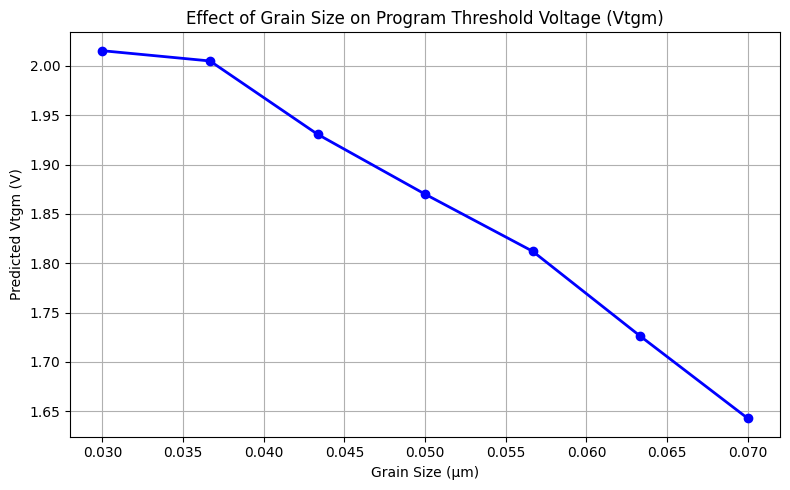

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a base input where all parameters are fixed except 'gsize'
base_input = {
    'width': 0.04, 'ico': 0.04, 'lcg': 0.04, 'lsl': 0.08, 'spcs': 0.06,
    'gsize': 0.05, 'gsigma': 0.02, 'max_angle': 15, 'ycut': 1,
    'zseed': 1, 'yseed': 2, 'aseed': 3
}

# Create 7 inputs with varying grain sizes
grain_sizes = np.linspace(0.03, 0.07, 7)
inputs = pd.DataFrame([{
    **base_input, 'gsize': g
} for g in grain_sizes])

# Scale inputs using the previously fitted scaler
inputs_scaled = scaler.transform(inputs)

# Predict Vtgm using the trained model
predicted_vtgm = model.predict(inputs_scaled).flatten()

# Print results
for g, vt in zip(grain_sizes, predicted_vtgm):
    print(f"Grain Size: {g:.3f} µm --> Predicted Vtgm: {vt:.4f} V")

# Plot Grain Size vs Predicted Vtgm
plt.figure(figsize=(8, 5))
plt.plot(grain_sizes, predicted_vtgm, marker='o', color='blue', linewidth=2)
plt.title('Effect of Grain Size on Program Threshold Voltage (Vtgm)')
plt.xlabel('Grain Size (µm)')
plt.ylabel('Predicted Vtgm (V)')
plt.grid(True)
plt.tight_layout()
plt.show()


PREDICT VALUES AND PUT THEM INTO AN EXCEL SHEET

In [7]:
import pandas as pd

# Load the original dataset again
file_path = 'NAND_PolyGrain_Dist_Excel.xlsx'
data = pd.read_excel(file_path)

# Keep a copy of the original data
output_data = data.copy()

# Define the input features used for prediction
input_features = ['width', 'ico', 'lcg', 'lsl', 'spcs', 'gsize',
                  'gsigma', 'max_angle', 'ycut', 'zseed', 'yseed', 'aseed']

# Prepare input for prediction
X_full = data[input_features]
X_full_scaled = scaler.transform(X_full)

# Predict using the trained model
predicted_vtgm = model.predict(X_full_scaled).flatten()

# Replace the simulated 'Vtgm_vgn' with the predicted values
output_data['Vtgm_vgn'] = predicted_vtgm

# Save to new Excel file
output_file_path = 'Predicted_Vtgm_Excel.xlsx'
output_data.to_excel(output_file_path, index=False)

print(f"Predicted data saved to {output_file_path}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted data saved to Predicted_Vtgm_Excel.xlsx


**PLOT LOSS VS EPOCHS, ACTUAL VS PREDICTED VALUES, RESIDUALS**

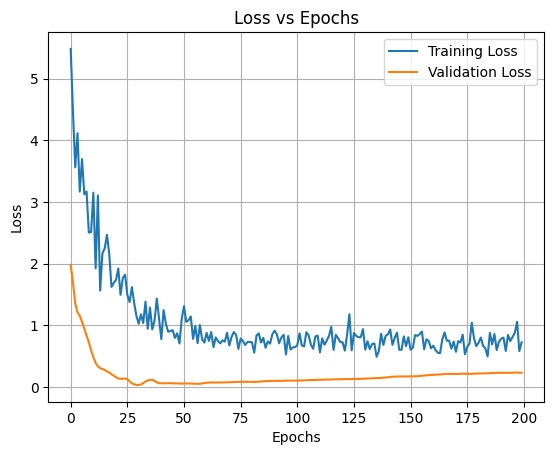

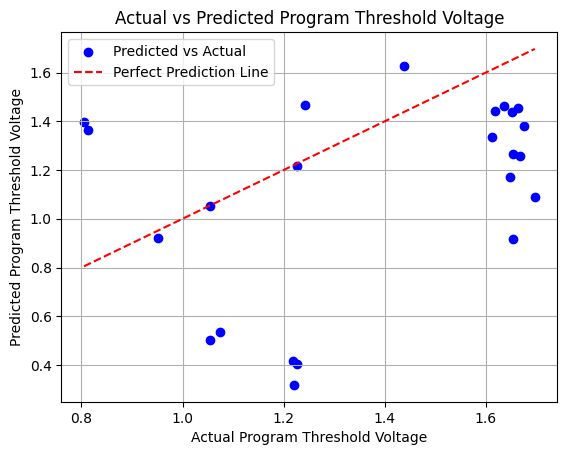

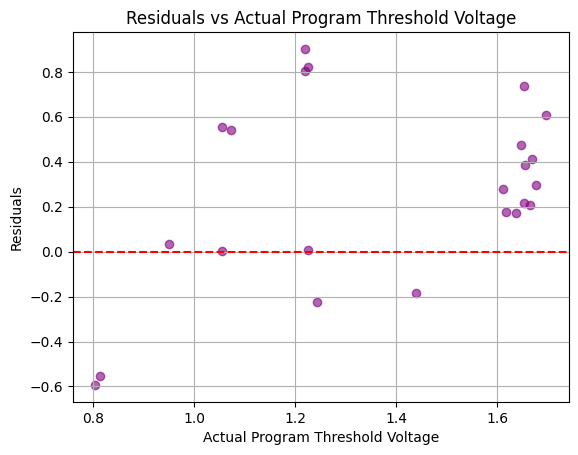

Mean of Residuals: 0.2638
Standard Deviation of Residuals: 0.3979


In [10]:
# Plot loss vs epochs
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

# Plot Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs Predicted Program Threshold Voltage')
plt.xlabel('Actual Program Threshold Voltage')
plt.ylabel('Predicted Program Threshold Voltage')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot Residuals
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Program Threshold Voltage')
plt.xlabel('Actual Program Threshold Voltage')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Print basic statistics of residuals
print(f'Mean of Residuals: {np.mean(residuals):.4f}')
print(f'Standard Deviation of Residuals: {np.std(residuals):.4f}')